<a href="https://colab.research.google.com/github/Exion007/Colab/blob/main/pandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [24]:
# How to create DataFrames

# Specify values for each column
df1 = pd.DataFrame(
{ "a" : [4, 5, 6],
  "b" : [7, 8, 9],
  "c" : [10, 11, 12]
},
  index = [1, 2, 3])

# Specify values for each row
df2 = pd.DataFrame(
[ [4, 5, 6],
  [7, 8, 9],
  [10, 11, 12]
],
  index=[1, 2, 3],
  columns=['a', 'b', 'c'])

# Create DataFrame with a MultiIndex
df3 = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
[('d', 1), ('d', 2),
 ('e', 2)],
 names=['n', 'v']))

print(df1, "\n")
print(df2, "\n")
print(df3)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12 

    a   b   c
1   4   5   6
2   7   8   9
3  10  11  12 

     a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12


# Reshaping Data

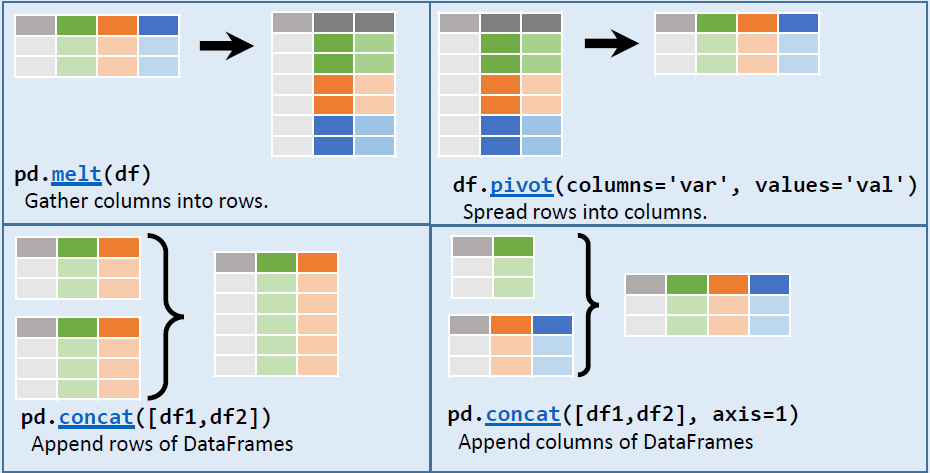

* .melt() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt

* .pivot() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html?highlight=pivot#pandas.DataFrame.pivot

* .concat() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat

In [25]:
# Reshaping Data

df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
print(df,"\n")

# .melt()
print(df.melt(id_vars=['A'], value_vars=['B']), "\n")
print(df.melt(id_vars=['A'], value_vars=['B', 'C']), "\n")
print(df.melt(id_vars=['A'], value_vars=['B'],
      var_name='VarName', value_name='ValName'), "\n")
df.columns = [list('ABC'), list('DEF')]
print(df)

   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6 

   A variable  value
0  a        B      1
1  b        B      3
2  c        B      5 

   A variable  value
0  a        B      1
1  b        B      3
2  c        B      5
3  a        C      2
4  b        C      4
5  c        C      6 

   A VarName  ValName
0  a       B        1
1  b       B        3
2  c       B        5 

   A  B  C
   D  E  F
0  a  1  2
1  b  3  4
2  c  5  6


# Combining Datasets

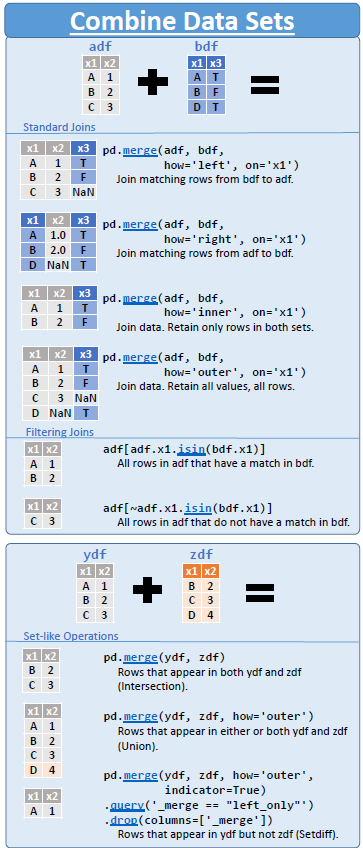

In [26]:
# Reading .csv files using Pandas
# First, upload the file; then, run the code

df = pd.read_csv("movies.csv")
df.head()

# Reading the files that are uploaded to Google Drive

# from os.path import join
# fname = "movies.csv"
# path_prefix = 'drive/MyDrive/'  # Use your own path here
# df = pd.read_csv(join(path_prefix, fname))
# df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [27]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}')

Number of rows: 10000
Number of columns: 14


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [29]:
# Given the id of the film, how to reach its info?
df.loc[493]

id                                                                    155
title                                                     The Dark Knight
release_date                                                   2008-07-14
genres                           ['Drama', 'Action', 'Crime', 'Thriller']
original_language                                                 English
vote_average                                                          8.5
vote_count                                                          29634
popularity                                                         81.582
overview                Batman raises the stakes in his war on crime. ...
budget                                                          185000000
production_companies    ['DC Comics', 'Legendary Pictures', 'Syncopy',...
revenue                                                        1004558444
runtime                                                               152
tagline                               

In [30]:
# Selecting subsets from the data frame based on a condition

df.loc[df.title == "The Dark Knight"]
df.loc[df["title"].isin(["Batman Begins", "The Dark Knight", "The Dark Knight Rises"])]
df.loc[(df['vote_average'] > 8.5) & (df['runtime'] > 150)]   # Using "and" or "or" keywords result in value error

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
317,238,The Godfather,1972-03-14,"['Drama', 'Crime']",English,8.7,17865,113.216,"Spanning the years 1945 to 1955, a chronicle o...",6000000,"['Paramount', 'Alfran Productions']",245066411,175,An offer you can't refuse.
946,424,Schindler's List,1993-12-15,"['Drama', 'History', 'War']",English,8.6,14028,57.910,The true story of how businessman Oskar Schind...,22000000,['Amblin Entertainment'],321365567,195,"Whoever saves one life, saves the world entire."
966,240,The Godfather Part II,1974-12-20,"['Drama', 'Crime']",English,8.6,10802,55.942,In the continuing saga of the Corleone crime f...,13000000,"['Paramount', 'The Coppola Company']",102600000,202,"I don't feel I have to wipe everybody out, Tom..."
3528,19404,Dilwale Dulhania Le Jayenge,1995-10-19,"['Comedy', 'Drama', 'Romance']",Hindi,8.6,4121,23.413,"Raj is a rich, carefree, happy-go-lucky second...",13200000,['Yash Raj Films'],100000000,190,"Come Fall In love, All Over Again.."
9807,1049767,The Chosen: Season 3 - Episodes 1 & 2,2022-11-18,"['Drama', 'History']",English,10.0,1,11.178,After Jesus completes a sermon that turns the ...,0,['Angel Studios'],0,160,NaN


In [42]:
# You can also use column names to select a subset
newdf = df.loc[:, ['id', 'title', 'budget']]
print(newdf, "\n")

df.iloc[:5,]             # First 5 rows
df.iloc[1:5,]            # Second to Fifth row
df.iloc[5,0]             # Sixth row and 1st column
df.iloc[1:5,0]           # Second to Fifth row, first column
df.iloc[1:5,:5]          # Second to Fifth row, first 5 columns
newdf = df.iloc[2:7,1:3] # Third to Seventh row, 2nd and 3rd column

print(newdf)

# You may use both column indices or their names in order to extract a subset.
# You can also create a seperate dataframe which contains only the columns that you selected.
# !! Compared to loc(), iloc() takes indices as parameters

          id                              title     budget
0     758323                The Pope's Exorcist   18000000
1     640146  Ant-Man and the Wasp: Quantumania  200000000
2     502356        The Super Mario Bros. Movie  100000000
3     868759                            Ghosted          0
4     594767           Shazam! Fury of the Gods  125000000
...      ...                                ...        ...
9995  374473                    I, Daniel Blake          0
9996   16774  Hellboy Animated: Sword of Storms          0
9997   13564    Return to House on Haunted Hill          0
9998  482204             My Sister-in-law's Job          0
9999  444539                       The Bookshop    5400000

[10000 rows x 3 columns] 

                              title release_date
2       The Super Mario Bros. Movie   2023-04-05
3                           Ghosted   2023-04-18
4          Shazam! Fury of the Gods   2023-03-15
5          Avatar: The Way of Water   2022-12-14
6  Guardians of the

In [45]:
# Handling missing information

newdf = df

print(f'Before filtering:\nNumber of rows: {newdf.shape[0]}\nNumber of columns: {newdf.shape[1]}\n')

# Delete rows containing at least 1 "NULL" value
newdf = df.dropna()

print(f'After filtering:\nNumber of rows: {newdf.shape[0]}\nNumber of columns: {newdf.shape[1]}')

# Fill the NA values with a value that you selected
newdf = df.fillna(0)

print("\n")
df.info()
print("\n")
newdf.info()

# !! Set inplace = True, if you want these operations to be conducted on the original DF
# df.dropna(inplace = True) || df.fillna(0, inplace = True)

Before filtering:
Number of rows: 10000
Number of columns: 14

After filtering:
Number of rows: 7240
Number of columns: 14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 1

In [33]:
# Filtering based on a column value
newdf = df[df["release_date"].notna()]
newdf = df.drop(df.loc[df["vote_average"] < 8.5].index)

# Filtering based on column name(s)
# Note: In addition to the indices method we used above, we can also use column names.

to_del = ["original_language", "vote_count", "production_companies", "tagline", "popularity", "overview"]
newdf = df.drop(to_del, axis=1)
newdf.head()

,id,title,release_date,genres,vote_average,budget,revenue,runtime
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",7.4,18000000,65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",6.6,200000000,464566092,125
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",7.5,100000000,1121048165,92
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",7.2,0,0,120
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",6.8,125000000,133437105,130


In [34]:
# Order rows by values of a column
newdf.sort_values("runtime", ascending = False, inplace = True)
newdf.head()

# !! Set ascending = True if you want to sort the rows from low to high (ascending is True by default)

,id,title,release_date,genres,vote_average,budget,revenue,runtime
4740,537268,Blood Curse,2023-02-25,"['Drama', 'Horror', 'TV Movie', 'Thriller']",8.3,0,0,449
9127,3870,1900,1976-09-01,"['Drama', 'History']",7.9,9000000,0,317
6970,715742,Trenque Lauquen,2023-05-02,"['Mystery', 'Romance', 'Drama']",7.0,0,0,260
5394,10655,Gettysburg,1993-10-08,"['Drama', 'History', 'War']",6.9,25000000,12700000,254
2831,8095,Cleopatra,1963-06-12,"['Drama', 'History', 'Romance']",7.1,44000000,71000000,248


In [35]:
# Queries using Pandas

df.query("vote_average > 8.5 and runtime > 130")
df.query('title.str.startswith("The")').head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
10,948713,The Last Kingdom: Seven Kings Must Die,2023-04-14,"['Action', 'Adventure', 'History', 'Drama', 'W...",English,7.3,317,1436.725,"In the wake of King Edward's death, Uhtred of ...",0,['Carnival Films'],0,111,NaN
19,1008005,The Communion Girl,2023-02-10,['Horror'],Spanish,6.2,85,676.862,"Spain, late 1980s. Newcomer Sara tries to fit ...",0,"['Ikiru Films', 'Atresmedia', 'Warner Bros. En...",0,103,NaN
27,994128,The Elderly,2023-04-21,"['Horror', 'Thriller', 'Fantasy']",Spanish,5.8,6,521.201,An octogenarian named Manuel falls into a stat...,0,[],0,95,Now it's too late


In [36]:
# Column Statistics

print("The number of total votes by users:", df.vote_count.sum())
print('Non-NA values in "release_date" column:', df.release_date.count())
print('Median of vote averages is:', df.vote_average.median())
print("Minimum movie duration is:", df.runtime.min())
print("Maximum movie duration is:", df.runtime.max())
print("Average movie duration is:", df.runtime.mean())
print("Variance of movie durations is:", df.runtime.var())
print("Standard deviation of movie durations is:", df.runtime.std())

The number of total votes by users: 15268424
Non-NA values in "release_date" column: 9979
Median of vote averages is: 6.5
Minimum movie duration is: 0
Maximum movie duration is: 449
Average movie duration is: 100.0296
Variance of movie durations is: 828.1265364936494
Standard deviation of movie durations is: 28.77718777944866


In [37]:
# Applying functions

print(df.production_companies[0][0])

def seperate(row):
  row = row[2:-2].replace("'","").split(", ")
  return row

df['production_companies'] = df['production_companies'].apply(seperate)

print(df.production_companies[0][0], "\n")


def filter_by_company(row, company):
    return company in row['production_companies']

target1 = "Marvel Studios"
target2 = "DC Comics"

marvel_movies = df[df.apply(filter_by_company, axis=1, args = (target1,))]
dc_movies = df[df.apply(filter_by_company, axis=1, args = (target2,))]

superhero_movies = pd.concat([dc_movies, marvel_movies])
superhero_movies.sort_values("id", inplace = True)
superhero_movies.head()

[
Screen Gems 



,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
493,155,The Dark Knight,2008-07-14,"['Drama', 'Action', 'Crime', 'Thriller']",English,8.5,29634,81.582,Batman raises the stakes in his war on crime. ...,185000000,"[DC Comics, Legendary Pictures, Syncopy, Isobe...",1004558444,152,Welcome to a world without rules.
1042,272,Batman Begins,2005-06-10,"['Action', 'Crime', 'Drama']",English,7.7,18989,43.473,"Driven by tragedy, billionaire Bruce Wayne ded...",150000000,"[Warner Bros. Pictures, DC Comics, Syncopy, Le...",374218673,140,Evil fears the knight.
2825,414,Batman Forever,1995-06-16,"['Action', 'Crime', 'Fantasy']",English,5.4,4635,23.285,Batman must battle a disfigured district attor...,100000000,"[DC Comics, Warner Bros. Pictures, PolyGram Fi...",336529144,121,"Courage Now, Truth Always, Batman Forever!"
3483,415,Batman & Robin,1997-06-20,"['Action', 'Science Fiction', 'Adventure', 'Co...",English,4.3,4485,24.492,Batman and Robin deal with relationship issues...,125000000,"[DC Comics, PolyGram Filmed Entertainment, War...",238207122,125,"Strength Now. Courage Always. Family, Above Al..."
825,559,Spider-Man 3,2007-05-01,"['Fantasy', 'Action', 'Adventure']",English,6.4,12660,57.637,The seemingly invincible Spider-Man goes up ag...,258000000,"[Laura Ziskin Productions, Marvel Studios]",890871626,139,The battle within.


<Axes: title={'center': 'Top 10 Highest Rated DC Movies'}, xlabel='Vote Average', ylabel='Title'>

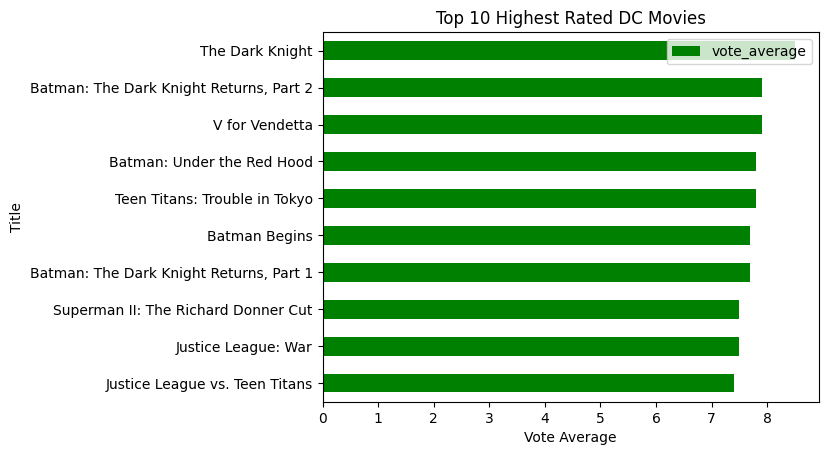

In [38]:
# Plotting

dc_movies = dc_movies.loc[:, ['title', 'vote_average']].sort_values(by = "vote_average", ascending = False)
dc_movies[:10][::-1].plot.barh(x = "title", y = "vote_average", color = 'green',
                               title = "Top 10 Highest Rated DC Movies",
                               xlabel = "Vote Average", ylabel = "Title")


# Pandas vs Polars


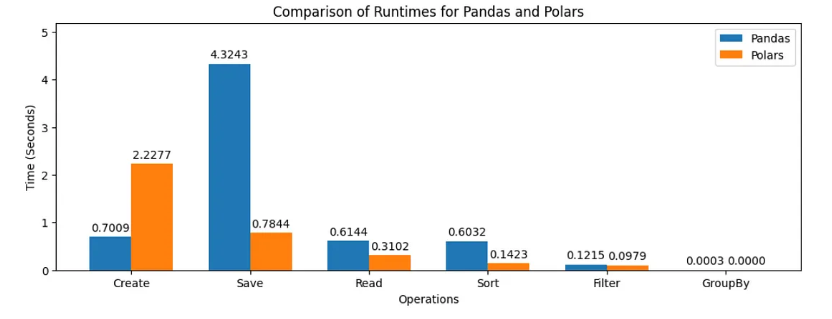


1. **Performance**
  * **Pandas:** Pandas is a widely used library, but its performance can become an issue when dealing with large datasets. It is primarily single-threaded and can struggle with performance optimization for certain operations.

  * **Polars:** Polars is designed with performance in mind. It is built on top of Rust and uses multithreading to leverage modern hardware efficiently. This can lead to significant speedups for operations on larger datasets.

2. **Memory Usage**

  * **Pandas**: Pandas can be memory-intensive, especially when dealing with large datasets. This can lead to memory-related issues when working on machines with limited memory.
  * **Polars**: Polars is designed to be memory-efficient. It employs memory-mapped files and efficient memory layouts to minimize memory consumption.

3. **API and Syntax**

  * **Pandas:** Pandas has a rich and mature API with a wide range of functions and methods. Its syntax is generally more familiar to users who have experience with tabular data manipulation in Python.
  
  * **Polars:** Polars aims to provide a similar API to Pandas, so users can transition more easily. However, there might be some differences in method names and behavior.

4. **Lazy Evaluation**

  * **Pandas:** Pandas doesn't inherently support lazy evaluation, meaning operations are usually performed immediately, which can lead to suboptimal memory usage and performance for complex operations.
  
  * **Polars:** Polars supports lazy evaluation, allowing you to build up a computation plan before executing it. This can help optimize memory usage and execution time for complex operations.

5. **Data Types**

  * **Pandas:** Pandas has a wide range of data types, but they can be limited in terms of performance and memory efficiency for certain use cases.
  
  * **Polars**: Polars provides a limited set of data types that are optimized for performance and memory usage. This can lead to better performance when working with large datasets.

6. **Integration with Ecosystem**

  * **Pandas:** Pandas has been around for a long time and is well-integrated into the Python data analysis ecosystem. Many libraries and tools support Pandas out of the box.

  * **Polars:** While Polars is gaining popularity, it might not have the same level of integration as Pandas in terms of support from other libraries and tools.

# Conclusion

* In summary, if you're working with relatively small datasets and value a mature ecosystem with a wide range of third-party support, Pandas might be a more familiar choice. On the other hand, if you're dealing with larger datasets and need better performance and memory efficiency, Polars could be a promising option to explore. Always consider the specific requirements of your project when choosing between the two.